In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
vti = pd.read_csv('VTI.csv',index_col='Date',parse_dates=True)['Adj Close']
gld = pd.read_csv('GLD.csv',index_col='Date',parse_dates=True)['Adj Close']
ivv = pd.read_csv('IVV.csv',index_col='Date',parse_dates=True)['Adj Close']
tlt = pd.read_csv('TLT.csv',index_col='Date',parse_dates=True)['Adj Close']
vdc = pd.read_csv('VDC.csv',index_col='Date',parse_dates=True)['Adj Close']
stocks = pd.concat([vti,gld,ivv,tlt,vdc],axis=1)
stocks.columns = ['vti','gld','ivv','tlt','vdc']

In [58]:
stocks.head()

,vti,gld,ivv,tlt,vdc
Date,,,,,
2018-03-20,137.427811,124.309998,268.542755,115.768562,132.875290
2018-03-21,137.310059,126.480003,268.052826,115.895088,131.418228
2018-03-22,133.946396,125.980003,261.299591,117.043533,130.205643
2018-03-23,131.138397,127.610001,255.748184,116.955925,128.650787
2018-03-26,134.596649,128.279999,262.805573,116.508247,130.420776


In [59]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

vti    0.000254
gld   -0.000027
ivv    0.000259
tlt    0.000223
vdc    0.000306
dtype: float64

In [60]:
stocks.pct_change(1).corr()

,vti,gld,ivv,tlt,vdc
vti,1.000000,-0.105779,0.996885,-0.362593,0.629613
gld,-0.105779,1.000000,-0.108252,0.271339,-0.179451
ivv,0.996885,-0.108252,1.000000,-0.360199,0.640742
tlt,-0.362593,0.271339,-0.360199,1.000000,-0.113695
vdc,0.629613,-0.179451,0.640742,-0.113695,1.000000


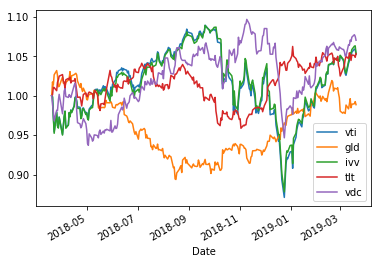

In [61]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [62]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,vti,gld,ivv,tlt,vdc
Date,,,,,
2018-03-20,NaN,NaN,NaN,NaN,NaN
2018-03-21,-0.000857,0.017456,-0.001824,0.001093,-0.010966
2018-03-22,-0.024497,-0.003953,-0.025194,0.009909,-0.009227
2018-03-23,-0.020964,0.012939,-0.021245,-0.000749,-0.011942
2018-03-26,0.026371,0.005250,0.027595,-0.003828,0.013758


In [63]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,vti,gld,ivv,tlt,vdc
Date,,,,,
2018-03-20,NaN,NaN,NaN,NaN,NaN
2018-03-21,-0.000857,0.017306,-0.001826,0.001092,-0.011026
2018-03-22,-0.024802,-0.003961,-0.025516,0.009861,-0.009270
2018-03-23,-0.021186,0.012856,-0.021474,-0.000749,-0.012013
2018-03-26,0.026029,0.005237,0.027221,-0.003835,0.013664


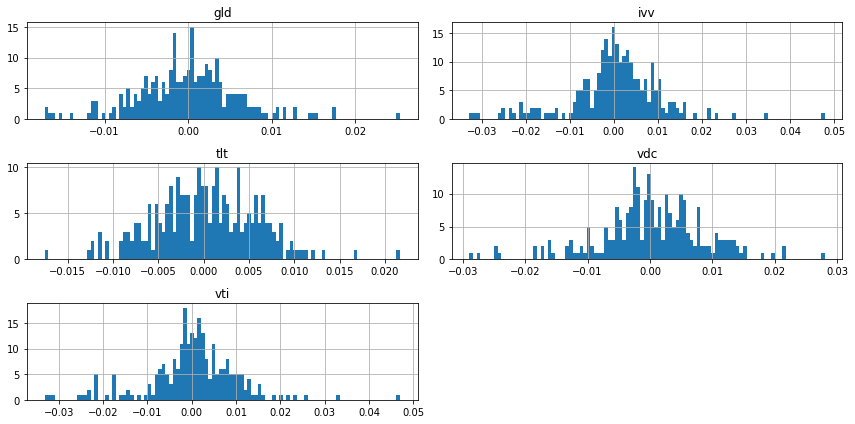

In [64]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [65]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vti,251.0,0.000204,0.010051,-0.033203,-0.003667,0.000622,0.005505,0.046998
gld,251.0,-0.000045,0.006122,-0.017164,-0.003923,0.000172,0.003408,0.025367
ivv,251.0,0.000208,0.010174,-0.032784,-0.003462,0.000513,0.005607,0.047884
tlt,251.0,0.000208,0.005621,-0.017524,-0.003466,0.000167,0.003935,0.021666
vdc,251.0,0.000271,0.008425,-0.028915,-0.003699,0.000072,0.005213,0.027988


In [66]:
log_ret.mean() * 252

vti    0.051284
gld   -0.011453
ivv    0.052326
tlt    0.052308
vdc    0.068305
dtype: float64

In [67]:
log_ret.cov()*252 # multiply by days

,vti,gld,ivv,tlt,vdc
vti,0.025456,-0.001645,0.025689,-0.005159,0.013429
gld,-0.001645,0.009444,-0.001703,0.002356,-0.002334
ivv,0.025689,-0.001703,0.026086,-0.005188,0.013834
tlt,-0.005159,0.002356,-0.005188,0.007963,-0.001345
vdc,0.013429,-0.002334,0.013834,-0.001345,0.017885


In [69]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(5))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['vti', 'gld', 'ivv', 'tlt', 'vdc'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]


Rebalance to sum to 1.0
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


Expected Portfolio Return
0.039149956905396285


Expected Volatility
0.08119777378419404


Sharpe Ratio
0.4821555454149313


In [70]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(5))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [72]:
sharpe_arr.max()

0.8517051705706803

In [73]:
sharpe_arr.argmax()

9739

In [74]:
all_weights[9739,:]

array([0.11908858, 0.03373769, 0.0568565 , 0.62060877, 0.16970846])

In [76]:
max_sr_ret = ret_arr[9739]
max_sr_vol = vol_arr[9739]

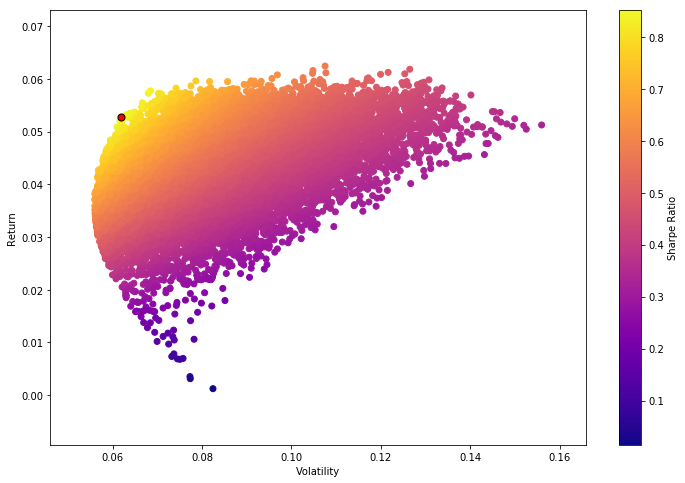

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [78]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [79]:
from scipy.optimize import minimize

In [80]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [81]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [45]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [82]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [83]:
# Initial Guess (equal distribution)
init_guess = [0.2,0.2,0.2,0.2,0.2]

In [84]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [85]:
opt_results

     fun: -0.5107487820788831
     jac: array([ 1.71586871e-05,  1.89824030e-02,  3.79427522e-03, -4.29548904e-01,
       -7.45058060e-09])
 message: 'Optimization terminated successfully.'
    nfev: 140
     nit: 14
    njev: 10
  status: 0
 success: True
       x: array([5.53570453e-15, 0.00000000e+00, 7.60416555e-12, 1.71519290e-14,
       1.00000000e+00])

In [86]:
opt_results.x

array([5.53570453e-15, 0.00000000e+00, 7.60416555e-12, 1.71519290e-14,
       1.00000000e+00])

In [87]:
get_ret_vol_sr(opt_results.x)

array([0.06830547, 0.13373595, 0.51074878])

In [88]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [89]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [90]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

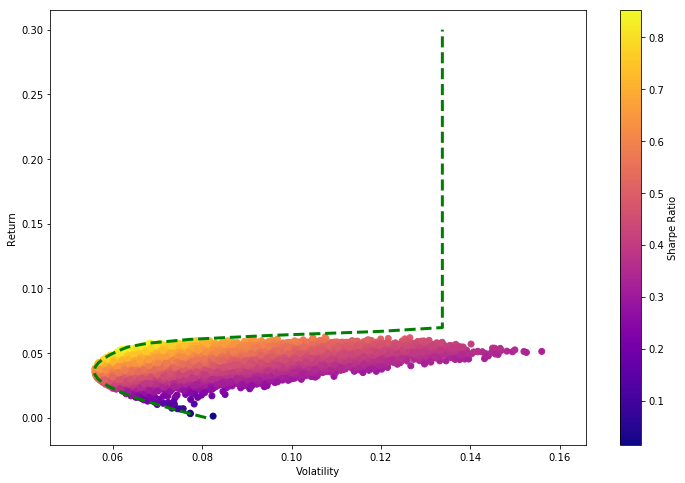

In [91]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)